In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

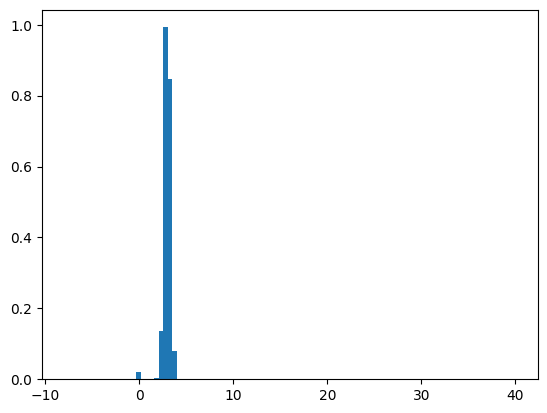

In [3]:
# Sample a normal distribution with a given mean and standard deviation
# and some outliers and plot the histogram of the samples
samples = np.hstack([np.random.normal(3.0, 0.3, 10000), [-8, 6, 8, 10, 12, 40]+[0,]*100])
# plot the histogram
plt.hist(samples, bins=100, density=True)
plt.show()

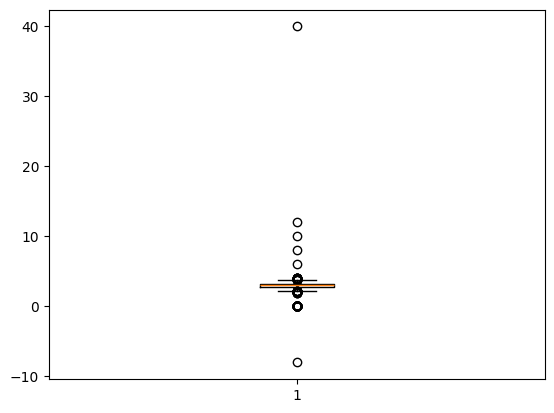

In [4]:
# use a boxplot to visualize the distribution
plt.boxplot(samples)
plt.show()

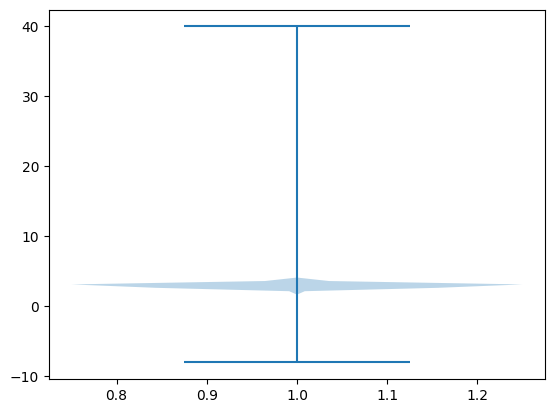

In [5]:
# use a violin plot to visualize the distribution
plt.violinplot(samples)
plt.show()

In [6]:
# Detect the outliers using the z-score
z_scores = (samples - np.mean(samples)) / np.std(samples)

outliers = np.abs(z_scores) > 3
print(f"Number of outliers: {np.sum(outliers)}")

[ 0.27433696 -0.11457817  0.58481695 ... -5.11198549 -5.11198549
 -5.11198549]
Number of outliers: 106


In [7]:
# put data into a pandas dataframe
df = pd.DataFrame(samples, columns=['value'])
df.describe()

,value
count,10106.000000
mean,2.980300
std,0.583031
min,-8.000000
25%,2.796689
50%,3.000447
75%,3.206792
max,40.000000


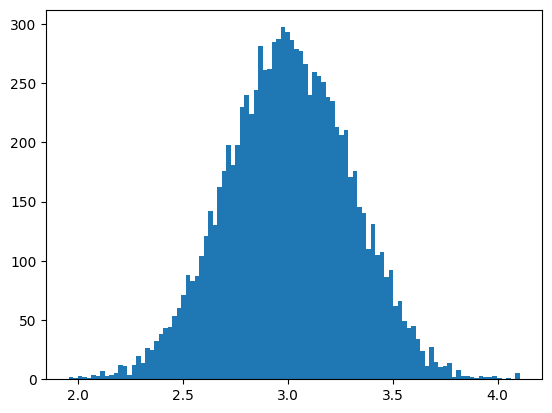

In [8]:
# Remove the outliers using the z-score (keep only the samples with z-score < -3 or > 3)
np.abs(z_scores).shape
df_clean = df[np.abs(z_scores) < 3]

# plot the histogram
plt.hist(df_clean['value'], bins=100)
plt.show()

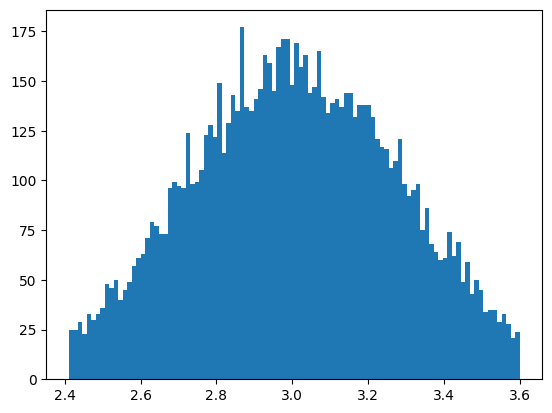

In [9]:
# apply the procedure again this time removing values with z-score > 2 or < -2
z_scores_clean = (df_clean['value'] - np.mean(df_clean['value'])) / np.std(df_clean['value'])
df_clean = df_clean[np.abs(z_scores_clean) < 2]
# plot the histogram
plt.hist(df_clean['value'], bins=100)
plt.show()

#######################################################################################
# Looks like we have removed too many samples!! (Be careful with the threshold you choose for the z-score!)
#######################################################################################


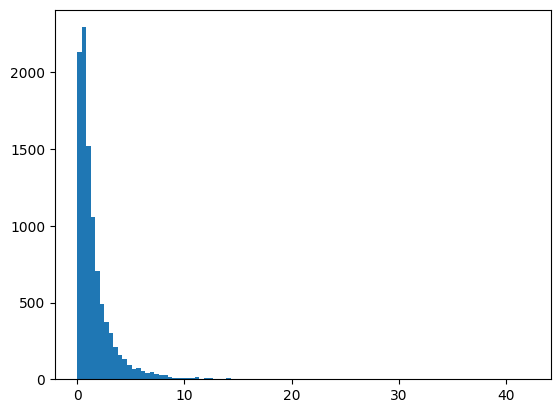

Number of outliers: 162


In [10]:
# Make an example with log-normal distribution
samples = np.random.lognormal(0, 1, 10000)
# plot the histogram
plt.hist(samples, bins=100)
plt.show()

# Detect the outliers using the z-score
z_scores = (samples - np.mean(samples)) / np.std(samples)
outliers = np.abs(z_scores) > 3
print(f"Number of outliers: {np.sum(outliers)}")

#######################################################################################
# Here it seems that the z-score is not a good measure to detect outliers
#######################################################################################